## 1) Home task : KNN classification
- load `iris` dataset
- split to train and test
- train KNN classifiers for different `K`
- choose the best `K` determined on test set

In [129]:
# === Imports === 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from matplotlib.colors import ListedColormap

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


Train size: 105
Test size: 45
k = 1 , accuracy = 0.9333
k = 2 , accuracy = 0.9111
k = 3 , accuracy = 0.9556
k = 4 , accuracy = 0.9556
k = 5 , accuracy = 0.9778
k = 6 , accuracy = 0.9333
k = 7 , accuracy = 0.9556
k = 8 , accuracy = 0.9333
k = 9 , accuracy = 0.9556
k = 10, accuracy = 0.9556
k = 11, accuracy = 0.9333
k = 12, accuracy = 0.9333
k = 13, accuracy = 0.9333
k = 14, accuracy = 0.9333
k = 15, accuracy = 0.9556
k = 16, accuracy = 0.9556
k = 17, accuracy = 0.9556
k = 18, accuracy = 0.9556
k = 19, accuracy = 0.9556
k = 20, accuracy = 0.9333

Best k = 5
Best accuracy = 0.9778


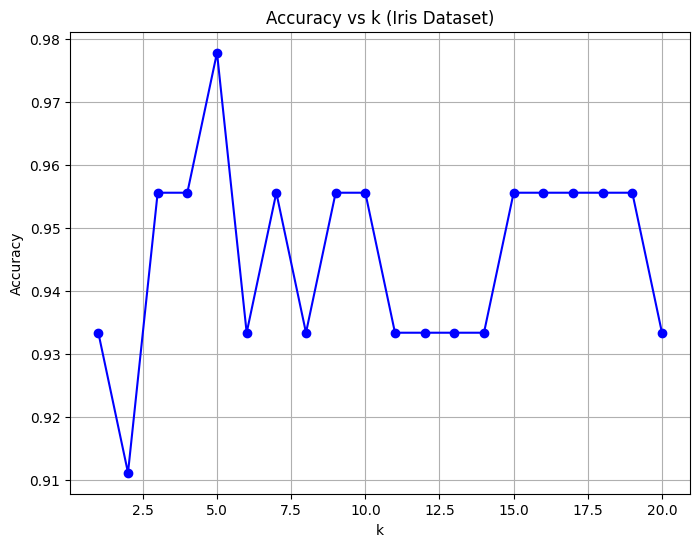

In [ ]:
# === Part 1: Iris Dataset (KNN Classification) ===

# 1. Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
labels = iris.target_names
feature_names = iris.feature_names

# Create DataFrame
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
df_iris['label_name'] = df_iris['label'].apply(lambda x: labels[x])

# Show the entire dataset
pd.set_option('display.max_rows', None)
display(df_iris)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

# 3. Train KNN classifiers for k = 1 to 20
scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"k = {k:<2}, accuracy = {score:.4f}")

# 4. Find the best k
best_k = k_values[np.argmax(scores)]
best_score = max(scores)

print(f"\nBest k = {best_k}")
print(f"Best accuracy = {best_score:.4f}")

# Visualization: Accuracy vs k (Iris)
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o', linestyle='-', color='blue')
plt.title("Accuracy vs k (Iris Dataset)")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## 2) Synthetic dataset
- generrate synthetic dataset
- split to train and test
- train KNN regressors for different `K`
- choose the best `K` determined on test set
- visualize the decision boundary 


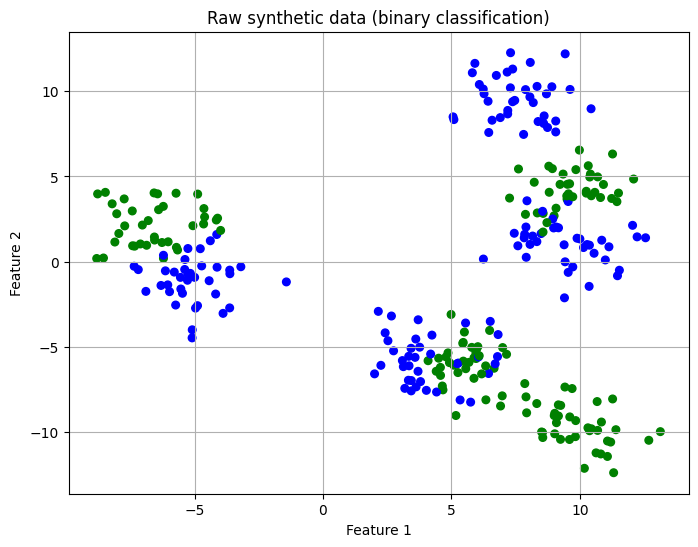

k = 1 , MSE = 0.1111
k = 2 , MSE = 0.0667
k = 3 , MSE = 0.0741
k = 4 , MSE = 0.0674
k = 5 , MSE = 0.0689
k = 6 , MSE = 0.0651
k = 7 , MSE = 0.0678
k = 8 , MSE = 0.0649
k = 9 , MSE = 0.0649
k = 10, MSE = 0.0670
k = 11, MSE = 0.0640
k = 12, MSE = 0.0688
k = 13, MSE = 0.0706
k = 14, MSE = 0.0736
k = 15, MSE = 0.0736
k = 16, MSE = 0.0731
k = 17, MSE = 0.0730
k = 18, MSE = 0.0783
k = 19, MSE = 0.0797
k = 20, MSE = 0.0824


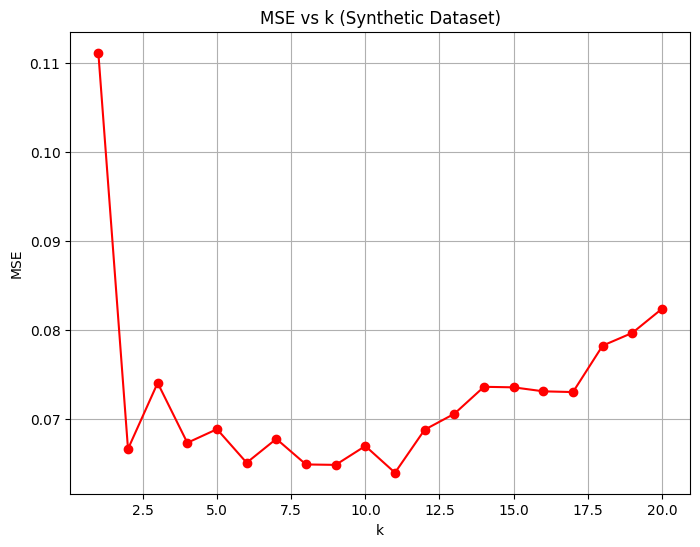


Best k (regression) = 11
Best MSE = 0.0640


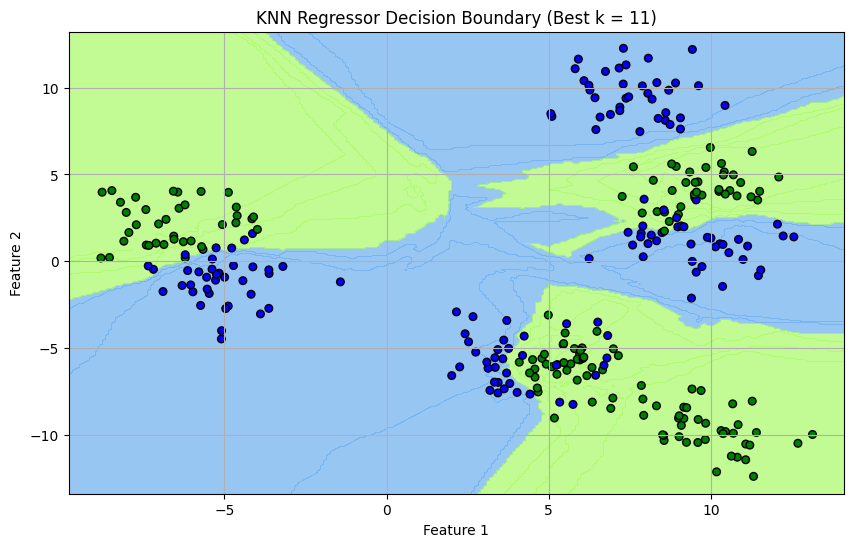

In [131]:
# === Part 2: Synthetic Dataset (KNN Regressor + Decision Boundary) ===

# 1. Generate synthetic binary classification dataset
X_syn, y_syn = make_blobs(
    n_samples=300,
    n_features=2,
    centers=8,
    cluster_std=1.3,
    random_state=4
)
y_syn = y_syn % 2

# 2. Split into train and test sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(
    X_syn, y_syn, test_size=0.3, random_state=42
)

# Visualize raw synthetic data
cmap_bold = ListedColormap(['blue', 'green'])

plt.figure(figsize=(8, 6))
plt.title("Raw synthetic data (binary classification)")
plt.scatter(X_syn[:, 0], X_syn[:, 1], c=y_syn, cmap=cmap_bold, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# 3. Train KNN Regressors for k = 1 to 20
mse_scores = []
k_values_syn = range(1, 21)

for k in k_values_syn:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_syn, y_train_syn)
    y_pred = knn_reg.predict(X_test_syn)
    mse = mean_squared_error(y_test_syn, y_pred)
    mse_scores.append(mse)
    print(f"k = {k:<2}, MSE = {mse:.4f}")

# isualization: MSE vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values_syn, mse_scores, marker='o', linestyle='-', color='red')
plt.title("MSE vs k (Synthetic Dataset)")
plt.xlabel("k")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# 4 Find the best k with lowest MSE
best_k_reg = k_values_syn[np.argmin(mse_scores)]
best_mse = min(mse_scores)

print(f"\nBest k (regression) = {best_k_reg}")
print(f"Best MSE = {best_mse:.4f}")

# 5. Visualize decision boundary using best k
cmap_light = ListedColormap(['#6DAFEF', '#A9FA67'])

knn_vis = KNeighborsRegressor(n_neighbors=best_k_reg)
knn_vis.fit(X_train_syn, y_train_syn)

# Create prediction grid
h = 0.1
x_min, x_max = X_syn[:, 0].min() - 1, X_syn[:, 0].max() + 1
y_min, y_max = X_syn[:, 1].min() - 1, X_syn[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
plt.scatter(X_syn[:, 0], X_syn[:, 1], c=y_syn, cmap=cmap_bold, edgecolor='k', s=30)
plt.title(f"KNN Regressor Decision Boundary (Best k = {best_k_reg})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()